# Problem Set 2021



## Author(s), contact(s), and dates:
- Author: Sophia Wilson
- Email:  ldr934@alumni.ku.dk
- Date:   3rd of January 2022

In [18]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Modules to see files and folders in directories
import math
from uncertainties import ufloat

## I - Distributions and probabilities

#### **1.1 Dices**

**Counting the number of 3s, N3 among 20 normal dice 1000 times**

In [19]:
N3 = []

for i in range(1000):
    count3s = 0
    
    for i in range(20):
        diceroll = np.random.randint(1,7)
        
        if diceroll == 3:
            count3s +=1
    
    N3.append(count3s)

**Defining a unit Poisson PDF** 

In [20]:
def poisson_pdf(r,Lambda):
    P = np.exp(-Lambda)*Lambda**r/math.factorial(r)
    return P

In [21]:
xmin = 0
xmax = max(N3)
x_poisson = np.linspace(xmin, xmax, xmax+1)
y_poisson = []

for i in x_poisson:
    y = poisson_pdf(i,np.mean(N3))
    y_poisson.append(y)

**Plotting the distribution of N3 and the unit Poisson PDF**

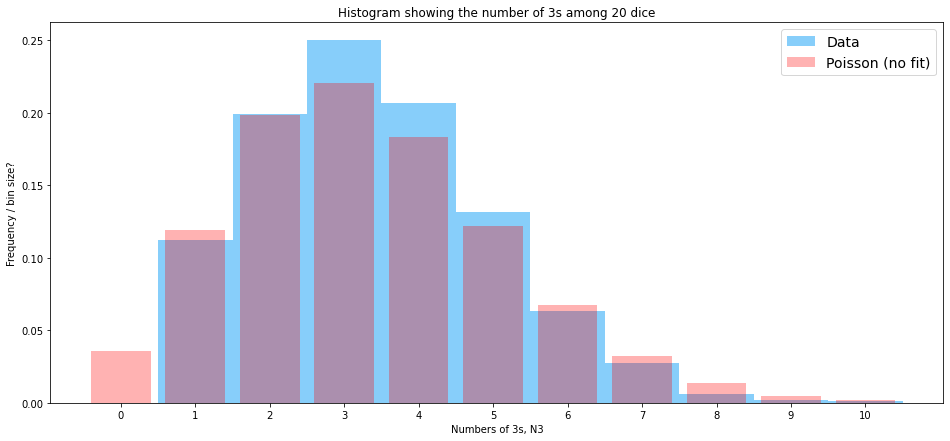

In [22]:
bins = np.linspace(0.5,max(N3)+0.5,max(N3)+1.5)
xticks = np.linspace(0,max(N3),max(N3)+1)

fig1, ax1 = plt.subplots(figsize=(16, 7)) 
hist1 = ax1.hist(N3, bins=bins, histtype='bar', color= 'lightskyblue', linewidth=2, density=True, label='Data')
ax1.set(xlabel='Numbers of 3s, N3', ylabel='Frequency / bin size?', title='Histogram showing the number of 3s among 20 dice')
ax1.bar(x_poisson,y_poisson, color= 'red',alpha = 0.3, linewidth=1.2,label='Poisson (no fit)')
ax1.legend(loc='upper right', fontsize=14);
ax1.set_xticks(xticks);

**What is the probability of getting 7 or more 3s in a roll with 20 normal dice?**

In [23]:
def biominal_pdf(r,n,p):
    P = p**r * (1-p)**(n-r) * math.factorial(n)/math.factorial(r)/math.factorial(n-r)
    return P

In [24]:
Ptotal = 0

for i in range(7,21):
    Ptotal += biominal_pdf(i,20,1/6)

In [25]:
print('The probability of getting 7 or more 3s is ', round(Ptotal*100,2), '%')

The probability of getting 7 or more 3s is  3.71 %


#### **1.2 COVID19 tests,  4th of January 2021**

**Assuming both tests are accurate (i.e. have no errors), what is the fraction of positives in
each test? And what is the probability that these fractions are statistically the same?**

In [63]:
test = np.array([[103261,2464],[26162,491]])
pcr_positive = test[0][1]/test[0][0]
ag_positive = test[1][1]/test[1][0]

print('Fraction of positive PCR tests:',test[0][1],'/',test[0][0],'=',pcr_positive, '=', round(pcr_positive*100,2),'%')
print('Fraction of positive AntiGen tests:',test[1][1],'/',test[1][0],'=', ag_positive,'=', round(ag_positive*100,2),'%')

Fraction of positive PCR tests: 2464 / 103261 = 0.023861864595539458 = 2.39 %
Fraction of positive AntiGen tests: 491 / 26162 = 0.01876767831205565 = 1.88 %


**If the two tests are sampling the same population, what is the false negative rate (i.e. rate
of positive testing negative) of the AntiGen test, assuming no other test errors?**

In [57]:
print('False negative rate of the AntiGen test:',round((pcr_positive-ag_positive)*100,2),'%')

False negative rate of the AntiGen test: 0.51 %


**A test has a 0.02% false positive rate and 20% false negative rate. You test 50000 persons,
finding 47 positives. What fraction of the Danish population would you estimate are infected?**

In [62]:
N_total = 50000
N_p = 47
false_p = 0.0002
false_n = 0.20

N_estimate = round(N_p + (N_total-N_p)*false_n - N_p*false_p)
print('Estimation of infected persons:', N_estimate,'persons')

Estimation of infected persons: 10038 persons


## II - Error propagation

#### **2.1 Law of error propagation**

In [26]:
x1 = ufloat(1.96, 0.03)
x2 = ufloat(0.96, 0.03)

x = [x1,x2]

for i in x:
    y = 1/(1+i**2)
    z = 1/(1-i)**2
    y_ = 'y = {:.2uf}'.format(y)
    z_ = 'z = {:.2uf}'.format(z)
    print(y_,z_)


y = 0.2065+/-0.0050 z = 1.085+/-0.068
y = 0.520+/-0.016 z = 625+/-937


# Things I don't need

In [27]:
def gauss_pdf(x, mu, sigma): #Unit Gauss
    return 1 / np.sqrt(2 * np.pi) / sigma * np.exp(-(x - mu)**2 / 2. / sigma ** 2)

xmin = 0
xmax = 10

x_gauss = np.linspace(xmin, xmax, 1000)  
y_gauss = gauss_pdf(x_gauss, np.mean(N3), np.std(N3))  

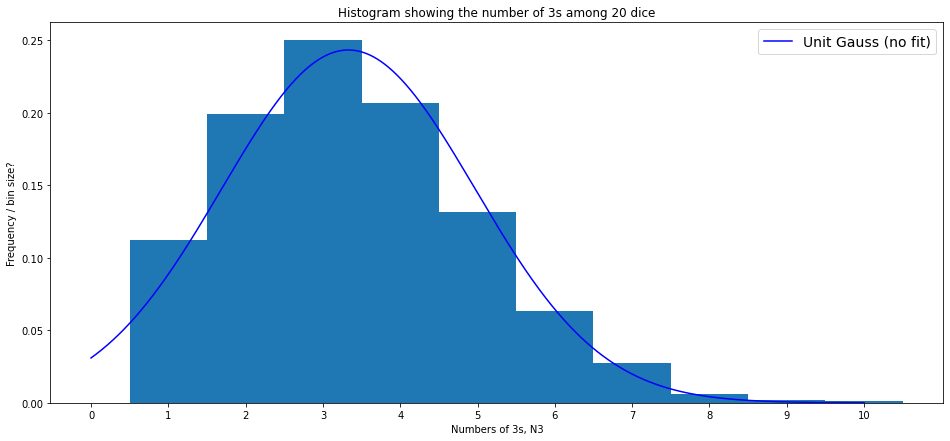

In [28]:
bins = np.linspace(0.5,max(N3)+0.5,max(N3)+1.5)
xticks = np.linspace(0,max(N3),max(N3)+1)

fig1, ax1 = plt.subplots(figsize=(16, 7)) 
hist1 = ax1.hist(N3, bins=bins, histtype='bar', linewidth=2, density=True)
ax1.set(xlabel='Numbers of 3s, N3', ylabel='Frequency / bin size?', title='Histogram showing the number of 3s among 20 dice')
ax1.plot(x_gauss, y_gauss, '-', color='blue', label='Unit Gauss (no fit)') 
ax1.legend(loc='upper right', fontsize=14);
ax1.set_xticks(xticks);